In [1]:
from config import *
import processing
import models
import torch.optim as optim
import torch.nn as nn
import numpy as np
import math
import torch
import json



In [2]:
import configs.transformer as cm
cm.CONFIG

namespace(DISCRETIZATION=namespace(PITCH_RES=128,
                                   DYN_RES=128,
                                   LENGTH_RES=400,
                                   TIME_RES=400,
                                   CHANNEL_RES=128,
                                   TEMPO_RES=300),
          RESOLUTION=namespace(BAR_RES=12),
          MODEL_VALUES=namespace(TEST_RATIO=0.2,
                                 BATCH_SIZE=8,
                                 BLOCK_SIZE=252,
                                 N_EMBD=128,
                                 N_HEAD=8,
                                 N_LAYER=8,
                                 FEEDFORWARD_DIM=2048,
                                 DROPOUT=0.01,
                                 EPOCHS=200,
                                 EVAL_INTERVAL=100,
                                 SAVE_INTERVAL=500,
                                 LEARNING_RATE=0.1,
                                 EVAL_ITERS=200,
                          

In [2]:
train_dataloader, test_dataloader = processing.get_train_test_dataloaders('F:\\GitHub\\dataset\\np_dataset')


In [4]:
import torch
import torch.nn as nn
from torch.optim import AdamW
from torch.utils.data import DataLoader
# Assuming processing.py exists and contains get_train_test_dataloaders
import processing  # Make sure you have this file
import models

# Data loading
train_dataloader, test_dataloader = processing.get_train_test_dataloaders('F:\\GitHub\\dataset\\np_dataset')

# Model Configuration
args = models.ModelArgs(
    d_model=128, # Example, adjust as needed
    n_layer=4, # Example, adjust as needed
    vocab_size=VOCAB_SIZE, # Example, adjust as needed
    d_state=64, # Example, adjust as needed
    expand=4, # Example. adjust as needed
    dt_rank = 8, # Example. adjust as needed
)
model = models.Mamba(args)
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
model.to(device)

# Optimizer and Loss Function
optimizer = AdamW(model.parameters(), lr=5e-4) # Example learning rate
criterion = nn.CrossEntropyLoss()

# Training Loop
num_epochs = 10  # Example number of epochs

def train(model, dataloader, optimizer, criterion, device):
    model.train()
    for batch_idx, (src, trg, metadata) in enumerate(train_dataloader):
        optimizer.zero_grad()
        outputs = model(src)
        loss = criterion(outputs.view(-1, outputs.size(-1)), trg.view(-1))
        loss.backward()
        optimizer.step()


def evaluate(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids)
            loss = criterion(outputs.view(-1, outputs.size(-1)), labels.view(-1))
            total_loss += loss.item()
    return total_loss / len(dataloader)




for epoch in range(num_epochs):
    train(model, train_dataloader, optimizer, criterion, device)
    val_loss = evaluate(model, test_dataloader, criterion,device)

    print(f"Epoch: {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}")

# Save the trained model
torch.save(model.state_dict(), "trained_mamba_model.pth")

print("Training complete. Model saved to trained_mamba_model.pth")

KeyboardInterrupt: 

In [6]:
for batch_idx, (src, trg, metadata) in enumerate(train_dataloader):
    src
model(src)

tensor([[[-10.8888,  -4.0384,  -4.9351,  ...,  10.7160,  19.7741, -11.4051],
         [  5.2334, -10.9134, -22.3910,  ...,  19.3346,  -4.5296, -12.8813],
         [-13.6919,  -3.8146, -16.1524,  ...,   8.9366,  13.6288,   3.0248],
         ...,
         [ -2.5006,   7.1041,  11.4404,  ..., -26.6092,   2.2654, -22.3841],
         [ -9.7289, -12.7942, -10.5393,  ...,  22.8997,   6.4594,   7.4741],
         [ -0.1105, -21.6887,  10.0519,  ...,  -9.6944,  -3.1796,   3.0747]],

        [[  7.7965, -16.1623, -18.8815,  ...,   6.3841,  15.5585,  18.3863],
         [  3.5721,   3.8034,  15.9112,  ...,   1.1973,  20.2115,  14.3474],
         [-23.1184,  -2.3423,   4.4069,  ...,   0.2315,   7.3398,  -4.8607],
         ...,
         [ -1.6749,   7.5199,  11.6485,  ..., -25.9470,   1.9286, -23.5073],
         [ -4.2561,   8.3175,   9.4181,  ...,  -0.8406,  14.4761, -15.4855],
         [  5.0381,   1.5632, -16.7492,  ...,  -4.4936,   2.5702,  -7.0694]],

        [[ -2.4788,   1.2746, -12.5283,  ...

In [ ]:
with open('F:\\GitHub\\dataset\\midi_dataset\\tokenizations.json', 'r') as f:
    tokenizations = json.load(f)
METADATA_VOCAB_SIZE = tokenizations['VOCAB_SIZE']
# vocab_size, n_embd, n_layer, n_heads, block_size, dropout, device
model = models.Transformer(VOCAB_SIZE, N_EMBD, N_LAYER, N_HEAD, BLOCK_SIZE, DROPOUT, DEVICE)
model.to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Training loop
num_epochs = EPOCHS
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    total_loss = 0

    for batch_idx, (src, trg, metadata) in enumerate(train_dataloader):
        # Forward pass
        output = model(src)
        # print(output.shape)
        # Reshape output and target for loss calculation
        output = output.reshape(-1, VOCAB_SIZE)  # Flatten the output to [batch_size * seq_len, vocab_size]
        trg = trg.view(-1)  # Flatten the target to [batch_size * seq_len]

        # Compute loss
        loss = criterion(output, trg)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

        if (batch_idx + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_dataloader)}], Loss: {loss.item():.4f}')

    avg_loss = total_loss / len(train_dataloader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}')

    # Validation loop (optional)
    model.eval()  # Set the model to evaluation mode
    val_loss = 0
    with torch.no_grad():
        for src, trg, metadata in test_dataloader:
            src, trg = src.to(DEVICE), trg.to(DEVICE)
            output = model(src, metadata)
            output = output.reshape(-1, VOCAB_SIZE)
            trg = trg.view(-1)
            val_loss += criterion(output, trg).item()
    
    avg_val_loss = val_loss / len(test_dataloader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {avg_val_loss:.4f}')

print("Training complete!")

In [7]:
for batch_idx, (src, trg, metadata) in enumerate(train_dataloader):
        # Forward pass
        output = model(src, metadata)
output.argmax(-1)[0]

tensor([ 259, 1057,  259, 1483, 1483, 1483, 1185, 1185,  259, 1483, 1483, 1483,
        1057, 1447,  259, 1483, 1483, 1483, 1185, 1185,  259,  657, 1483, 1483,
        1185, 1185,  259,  657, 1483, 1483,  257, 1057, 1057, 1483, 1057, 1483,
        1185,  259,  259, 1483,  657, 1483, 1185, 1057,  259,  657, 1483, 1483,
        1185, 1057,  259,  657, 1483, 1483, 1185,  257,  259,  657,  657, 1483,
         259, 1185,  259,  657, 1483, 1483, 1057,  257,  259, 1483, 1483, 1483,
        1185, 1185,  259, 1483, 1483, 1483, 1185, 1057,  259, 1483, 1483, 1483,
        1185, 1057,  259,  657, 1057, 1483, 1185, 1185,  259,  657,  657, 1483,
        1185, 1057,  259,  657, 1483, 1483, 1057,  257,  259,  657, 1483, 1483,
         257, 1057, 1185,  657, 1057, 1483, 1185, 1185,  259,  657,  657, 1483,
        1185, 1057,  259,  657, 1483, 1483, 1185, 1185,  259,  657, 1483, 1483,
        1057, 1057,  259,  657, 1483, 1483, 1185, 1185,  259,  657, 1483, 1483,
        1185, 1057,  259,  657,  657, 14

<BarContainer object of 1485 artists>

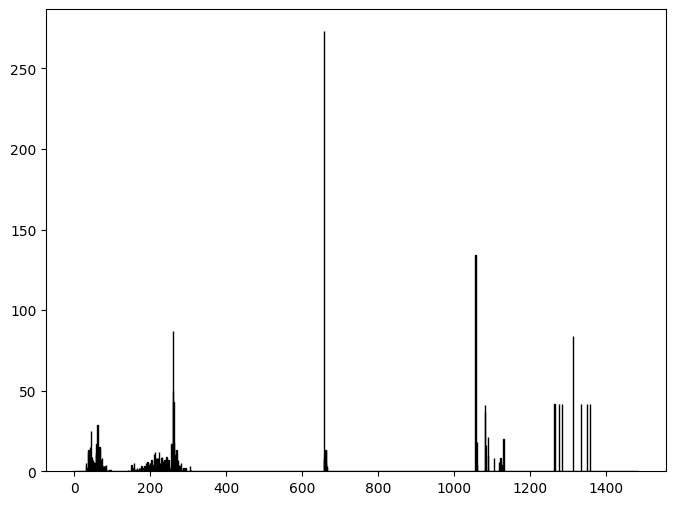

In [89]:
flattened_tensor = src.flatten()
bins = VOCAB_SIZE
hist = torch.histc(flattened_tensor.int(), bins=bins, min=0, max=VOCAB_SIZE)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(range(bins), hist.cpu().int().numpy(), width=1, align='center', color='blue', edgecolor='black')
